             0         1         2         3
0     1.038502  0.899865  0.835053 -0.971528
1     0.320455 -0.647459  0.149079  0.352593
2     0.055480  2.234771  0.271672 -2.108739
3    -0.007260 -0.524299 -0.126550  0.670827
4    -1.237390 -1.377017 -1.049932  1.342079
5     0.477841  0.032660  0.336723 -0.171675
6    -0.486923 -1.128336 -0.459850  1.113013
7     0.313020  0.677323  0.123082 -0.617958
8     0.919790 -0.539665  0.956577  0.821389
9     0.574238 -1.024339  0.471622  1.006623
10   -0.745211  1.117401 -0.955933 -1.128786
11   -0.472249  1.819872 -0.660452 -1.782977
12    0.426001  1.501646  0.275335 -1.466056
13    1.529169  1.964452  1.485045 -1.950166
14    0.454290 -0.643795  0.417083  0.623628
15    2.225789 -0.015177  2.123942  0.125185
16    0.325455 -0.679482  0.589621  0.849904
17   -0.620078 -0.260013 -0.631947  0.314077
18   -0.968355 -0.576313 -0.852067  0.608772
19   -0.497867 -0.826118 -0.474271  0.877328
20    0.138424  2.346433  0.246833 -2.328777
21   -0.61

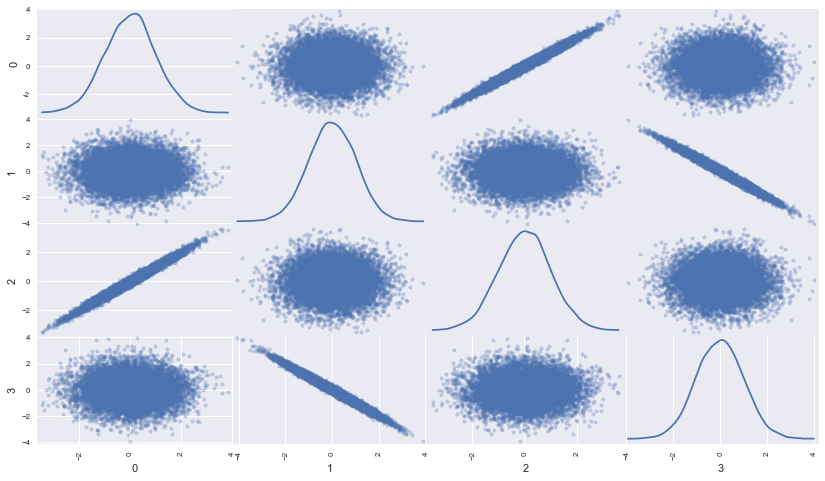

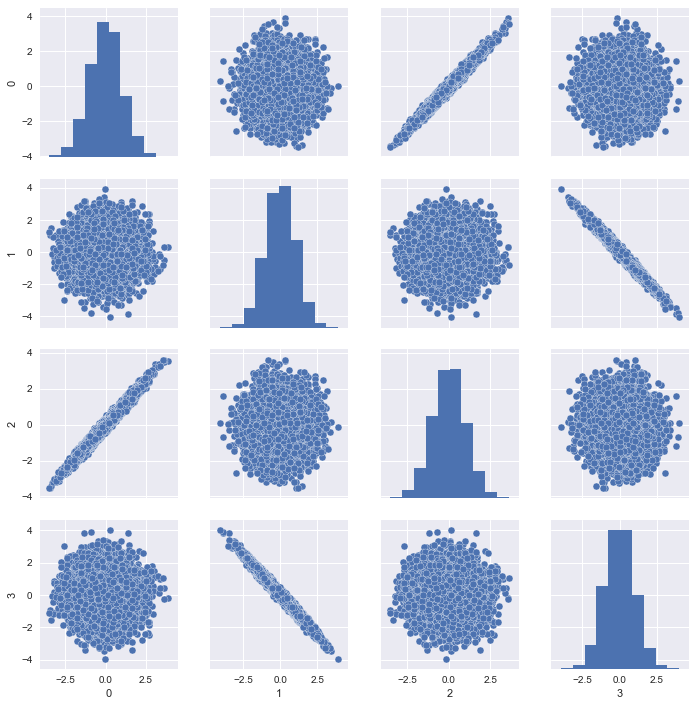

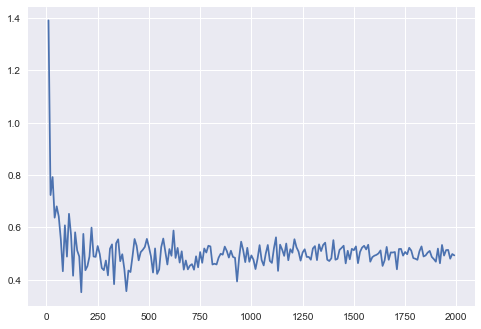

Done


In [8]:
## Akaash Chikarmane, Sean Tremblay
## Programming Question 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

df = pd.read_table('DF1', sep=',')#, header = None)
df = df.drop(df.columns[0], axis=1)
print(df)

#correlated_df = df.corr('pearson')

#print(correlated_df)

#This is part 2
covariance_df = np.cov(df, rowvar=False)
print(covariance_df)

print(" The numbers fit with the plot I got, because the closer the value is to being <= 1 the more correlated they are")

#Part1
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
seaborn.pairplot(df)

plt.show()

mean = [0,0,0]
cov =[[1,.2,0],[.2,1,.5],[0, .5, 1]]
#mean = [0, 0]
#cov = [[1, 0], [0, 100]]

#gives correct covariance matrix
#cov_array = np.cov(np.random.multivariate_normal(mean, cov, size=1000), rowvar=False)

#1000 is too short
covariance_x = range(10,2000,10)
covariance_y_array = []

# Going to check it versus third row second column ,
# should be .5
for i in covariance_x:
    covariance_y = np.cov(np.random.multivariate_normal(mean, cov, i) , rowvar=False)[2][1]
    covariance_y_array.append(covariance_y)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(covariance_x, covariance_y_array)

plt.show()

print("Done")

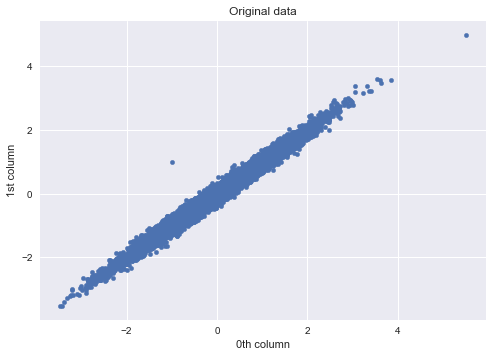

Transformation Q =  [[ 5.31270488 -4.6064893 ]
 [-4.6064893   5.31496647]]


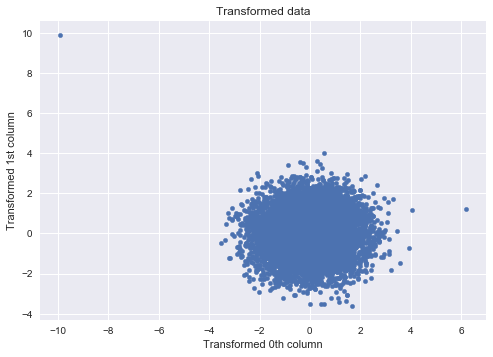

Below are the two outlying points. The 0th row is formerly (-1, 1). The 1st row is formerly (5.5, 5)


,0,1
0,-9.919194,9.921456
1,6.187430,1.239141


In [10]:
## Programming Question 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as splin

## Questions
# Which one is more outlying?
# I would say the point at (-1, 1) is more of an outlier because it is farther away from the best fit line that the rest of the data seems to follow

# Propose a transformation:
# (sqrt(cov(input=Y)))^-1 <- transformation matrix
# Printed below

# Justify your choice of transformation
# Y = QZ <- we're after Z
# Y ~ N(mu, covariance matrix)
# var(Y) = var(QZ) = QZQ^T = covariance matrix
# If we say Z = identity matrix, we can just take the square root of the covariance matrix of Y to get Q
# (Q^-1)Y = Z

# Initial scatter plot
df = pd.read_table('DF2', sep=',')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.plot.scatter(x=0, y=1)
plt.xlabel("0th column")
plt.ylabel("1st column")
plt.title("Original data")
plt.show()

# Transformed scatter plot to show distance of each point from center. Shows that point at (-1, 1) is more of an outlier than (5.5, 5)
yT = df.transpose()
outliersT = np.array([[-1, 5.5], [1, 5]])
covariance = np.cov(m=yT, rowvar=True)
Q = splin.sqrtm(A=covariance)
Q_inverse = splin.inv(a=Q)
print("Transformation Q = ", Q_inverse)
outliers_transform = np.dot(Q_inverse, outliersT)
outliersData_transform = pd.DataFrame(outliers_transform.transpose())
zT = np.dot(Q_inverse, yT)
z = pd.DataFrame(zT.transpose())
z.plot.scatter(x=0, y=1)
plt.xlabel("Transformed 0th column")
plt.ylabel("Transformed 1st column")
plt.title("Transformed data")
plt.show()

print("Below are the two outlying points. The 0th row is formerly (-1, 1). The 1st row is formerly (5.5, 5)")
outliersData_transform.head()

In [11]:
## Programming Question 3

print("YEAH G")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("YEAH G")
from sklearn import linear_model
#from sklearn import datasets ## imports datasets from scikit-learn
#data = datasets.load_boston() ## loads Boston dataset from datasets library
import math
def standard_error_for_different_error(error_value):

    Beta_values = []
    # Akaash here's the website: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

    lm = linear_model.LinearRegression()
    for i in range( 0 , 1000):


        Gaussian_Normal_x = np.random.randn(error_value)

        #print(Gaussian_Normal_x)
        Gaussian_Normal_e = np.random.randn(error_value)

        #print(Gaussian_Normal_e)
        # Don't need x since it s just 0's
        y_values = -3 + Gaussian_Normal_e

        # Get a column vector of x, y
        #model = lm.fit(X,y)

        lm.fit(Gaussian_Normal_x.reshape(error_value, 1), y_values)
        # SANITY CHECK:
        #lm.coef_
        #will give an output like:

        #array([ -1.07170557e-01,   4.63952195e-02,   2.08602])
        Beta_values.append(lm.coef_[0])

    standard_dev_d = np.std(Beta_values)

    return standard_dev_d

try:
    beta_hat = None

    error_range = range(5,506, 100)
    error_range.append(150)
    error_range.sort()

    empirical_standard_dev_of_error = []
    #empirical_standard_dev_of_error.append(standard_error_for_different_error(150))

    for error_value in error_range:

        empirical_standard_dev_of_error.append(standard_error_for_different_error(error_value))

    python_plot = plt.plot(error_range, empirical_standard_dev_of_error)
    plt.show()

    print("Standard dev at n=150 is .084596, a value of .15 is within 2 standard deviations of this value. If the value \\n needs to fall somewhere above or below 5-95% respectively then this s insignificant, so 1-2 standard deviatios is ok, this is fine  ")

   # plot 1 / sqrt(n)

    j = 0
    sqrt_error_range = []
    #empirical_standard_dev_of_error = []
    for value in error_range:
        sqrt_error_range.append(1/(np.sqrt(value)))
    #for error_value in sqrt_error_range:

    np_list_standard_dev = np.array(empirical_standard_dev_of_error, dtype=np.float)
    np_list_error_range = np.array(error_range, dtype=np.float)

    np_sqrt_list = np_list_standard_dev / np_list_error_range

    plt.plot(error_range, np_sqrt_list, color='green')
    #python_plot = plt.plot(sqrt_error_range, empirical_standard_dev_of_error)
    plt.show()

    print("Fit is good, the scaled graph follows the same pattern as the non-scaled one")
except Exception as e:
    print("YEAH G" + str(e))



YEAH G
YEAH G
YEAH G'range' object has no attribute 'append'


In [12]:
## Programming Question 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def retrieve_file(XXXX):
    X_string = str(XXXX)
    path = ".\\Names\\" + "yob" + X_string + ".txt"
    result = pd.read_table(path, sep=',', header=None)
    return result

# input k and XXXX, returns the top k names from year XXXX
def TopKNames(k, XXXX):
    df = retrieve_file(XXXX)
    df = df.groupby(0).agg(sum) #groups by name then aggregates/sums them
    sorted = df.sort_values(by=2, ascending=False) #sorts by frequency
    print(sorted[:k])
    return sorted.nlargest(n=k, columns=2)

# input Name returns the frequency for men and women of the name Name
def NameFreq(Name, XXXX):
    df = retrieve_file(XXXX)
    rows, columns = df.shape
    result = pd.DataFrame()
    for row in range(rows):
        if(df[0][row] == Name):
            print(Name + "(" + str(df[1][row]) + ")" + " has frequency " + str(df[2][row]))
            result = result.append(df.iloc[row], ignore_index = True)
    return result

# input Name = name to search for, XXXX = year, bPrint = boolean print (true = print, false = don't print) returns the relative frequency for men and women of the name Name
def NameRelFreq(Name, XXXX, bPrint):
    df = retrieve_file(XXXX)
    rows, columns = df.shape
    result = pd.DataFrame()
    for row in range(rows):
        if(df[0][row] == Name):
            if(bPrint):
                print(Name + "(" + str(df[1][row]) + ")" + " has relative frequency " + str(np.divide(df[2][row], rows)))
            result = result.append(df.iloc[row], ignore_index = True)
    result_rows, result_cols = result.shape
    if(not result.empty):
        extra = np.array([np.divide(result[2][0], rows)], dtype=float)
    if(result_rows > 1):
        extra = np.append(extra, [np.divide(result[2][1], rows)])
    if(not result.empty):
        result[3] = extra
        result.drop(2, axis=1, inplace=True)
        result.columns=[0, 1, 2]
        result = result.sort_values(2, ascending=False).reset_index(drop=True)
    if(bPrint):
        print(result)
    return result

# Outputs names that became more popular for the other gender in XXXX vs. YYYY. Does not check YYYY vs. XXXX. XXXX and YYYY can be any year between and including 1880 and 2015
def PopularityShift(XXXX=1880, YYYY=2015):
    result = []
    result = np.array(result)
    df0 = retrieve_file(XXXX)
    df1 = retrieve_file(YYYY)
    dup_df0 = df0.duplicated(subset=0, keep='first')
    for row in range(dup_df0.size):
        if(dup_df0[row]):
            name = df0[0][row]
            if(not (NameRelFreq(name, YYYY, False).empty)): # if the name exists in YYYY
                test0 = NameRelFreq(name, XXXX, False)
                #print(test0)
                test1 = NameRelFreq(name, YYYY, False)
                #print(test1)
                if(test0[1][0] != test1[1][0]): # if the higher relative frequency of name has a different gender in year YYYY than in year XXXX
                    result = np.append(result, [name])
    print("Names that shifted gender popularity between " + str(XXXX) + " and " + str(YYYY) + ": " , result)
    return result

TopKNames(10, 1980)
NameFreq("Michael", 1980)
NameRelFreq("Michael", 1980, True)
PopularityShift(1881, 2014)

                 2
0                 
Michael      69219
Jennifer     58591
Christopher  49401
Jason        48479
David        42212
James        39583
Matthew      38054
Joshua       36283
Amanda       35905
John         35522
Michael(F) has frequency 546
Michael(M) has frequency 68673
Michael(F) has relative frequency 0.0280878646021
Michael(M) has relative frequency 3.53274345388
         0  1         2
0  Michael  M  3.532743
1  Michael  F  0.028088
Names that shifted gender popularity between 1881 and 2014:  ['Marion' 'Sidney' 'Leslie' 'Alva' 'Ollie' 'Jimmie' 'Lou' 'Artie' 'Alpha'
 'Jean' 'Guadalupe' 'Theo']


array(['Marion', 'Sidney', 'Leslie', 'Alva', 'Ollie', 'Jimmie', 'Lou',
       'Artie', 'Alpha', 'Jean', 'Guadalupe', 'Theo'], 
      dtype='<U32')

In [13]:
## Programming Question 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
import seaborn


tweets = pd.read_csv("tweets.csv")
tweets.head()


def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

# user_location ,
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()


cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets,
        sa_tweets,
        tr_tweets
    ],
    stacked=True,
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()


tweets["user_bg_color"].value_counts()

#####

tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

######


gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

######



def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()



fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()



# TO CORRECTLY ASSIGN STATES VS Actual State have columns for 50 states

# THen for each Point in Dictionary: [Texas, Kentucky, etc. Also check the abbbreviation " TX "

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",'Alabama','Alaska','Arizona','Arkansas','California','Colorado',
         'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho',
         'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio',
         'Oklahoma','Oregon','Pennsylvania','Rhode Island',
         'South Carolina','South Dakota','Tennessee','Texas','Utah',
         'Vermont','Virginia','Washington','West Virginia',
         'Wisconsin','Wyoming']

# WE NEED TO CATEGORIZE TWEETS BY STATE

# Check if we already know location and it has name or abbrev in tweet
# 1 CHeck for state name and abbreviation in tweet
states_tweets ={}
total_tweet_list = tweets
total_len = 0
total_tweets = len(tweets)
for i in range(0 , 49):
    state_abbrev = states[i]
    states_name = states[i + 51]
    # user_location

    if i == 48 :
        print(" K")

    Abbrev_tweets = tweets["user_location"]#.str.find(states_name)]
    Name_tweets = tweets["user_location"]#.str.find(states_name)]

    All_tweets = Abbrev_tweets + Name_tweets
    individual_state_array = []
    for i in range(0, len(Abbrev_tweets)):
        try:
            if (Abbrev_tweets[i] == "NaN"):
                pass
            else:

                if states_name in Abbrev_tweets[i] or state_abbrev in Name_tweets[i]:
                    individual_state_array.append(i)

        except:
            pass
    states_tweets[states_name] = len(individual_state_array)
    total_len = total_len +  len(individual_state_array)

Non_Registered = total_tweets - total_len
states_tweets["NON_REGISTERED"] = Non_Registered

print(states_tweets)

print("I can correctly assign: " +str(total_tweets) + " out of " + str(Non_Registered))

print("Done")
    #tr_tweets = tweets["user_age"][tweets["candidate"].__contains__("clinton")]



    #Abbrev_tweets = tweets["user_location"][tweets["candidate"].__contains__(states_name)]
    #index_Abbrev_tweets = tweets["user_location"][tweets["candidate"].__contains__(state_abbrev)].index(Abbrev_tweets)
    #Name_tweets = tweets["user_age"][tweets["candidate"].__contains__("clinton")]
    

FileNotFoundError: File b'tweets.csv' does not exist